In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [157]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

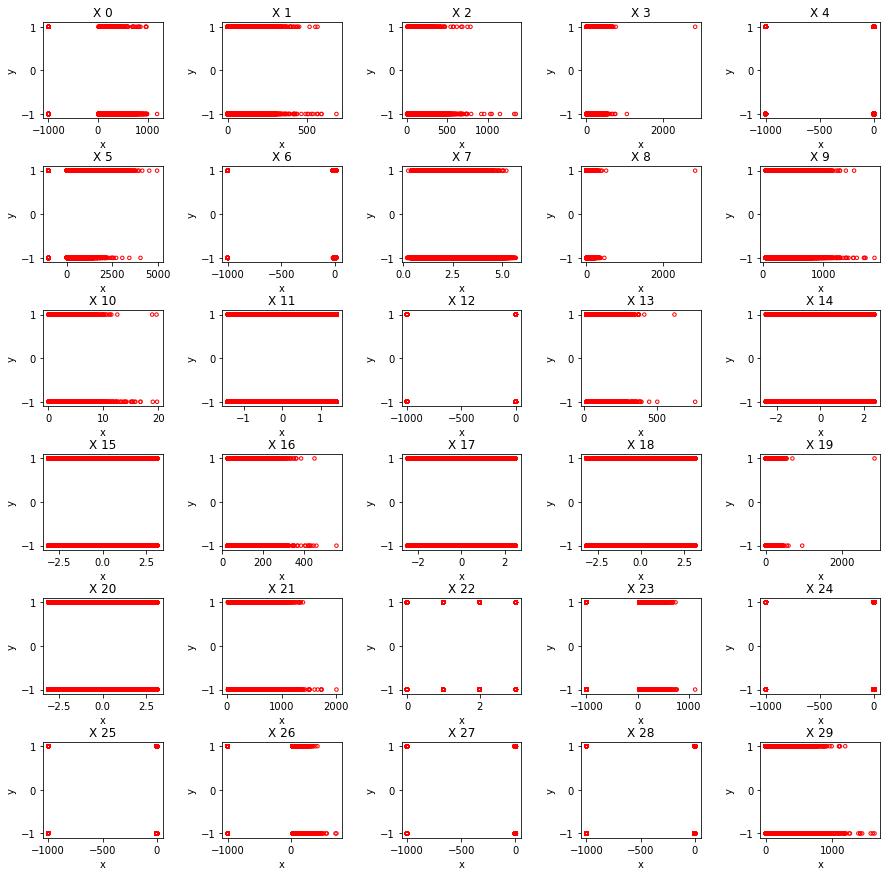

In [158]:
# Exploring data 
# define the structure of the figure
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(15,15))

for i in range(tX.shape[1]):
    ax = axs[i // num_col][i % num_col]
    ax.scatter(tX[:,i], y, color='b', s=12, facecolors='none', edgecolors='r')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("X " + str(i))

plt.subplots_adjust(wspace = .5, hspace = .5)

(250000, 30) (250000,) (250000,)
4974.979 -18.066 47.28083347186447 98.12961984229473
[]


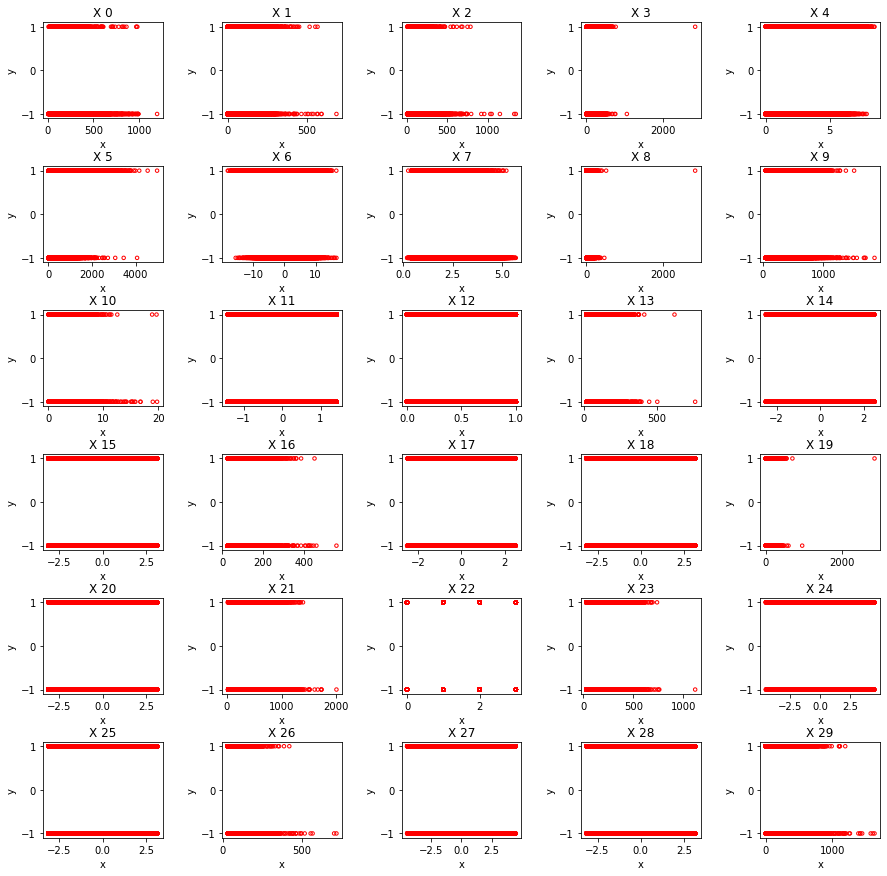

In [164]:
from implementations import *
print(tX.shape, y.shape, ids.shape)
print(np.max(tX), np.min(tX), np.mean(tX), np.std(tX))

tX = remove_undefined_variable(tX)

# define the structure of the figure
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(15,15))

for i in range(tX.shape[1]):
    ax = axs[i // num_col][i % num_col]
    ax.scatter(tX[:,i], y, color='b', s=12, facecolors='none', edgecolors='r')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("X " + str(i))

plt.subplots_adjust(wspace = .5, hspace = .5)


In [ ]:
#############################
#### Preprocessing
#############################



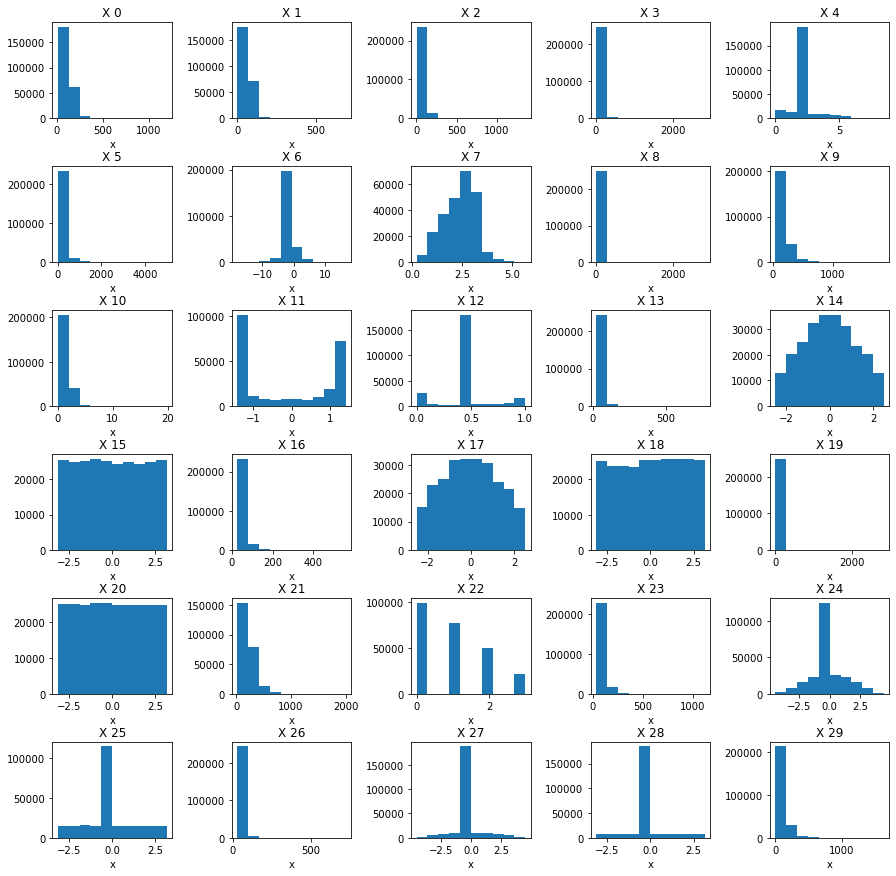

In [165]:
# define the structure of the figure
num_row = 6
num_col = 5

f, axs = plt.subplots(num_row, num_col,figsize=(15,15))

for i in range(tX.shape[1]):
    ax = axs[i // num_col][i % num_col]
    ax.hist(tX[:,i])
    ax.set_xlabel("x")
    ax.set_title("X " + str(i))

plt.subplots_adjust(wspace = .5, hspace = .5)

In [211]:
from implementations import *
tX2 = remove_aberrant_features(tX)
print(tX2.shape)

print(np.sum(tX[:,19] > 1))

(250000, 29)
26275


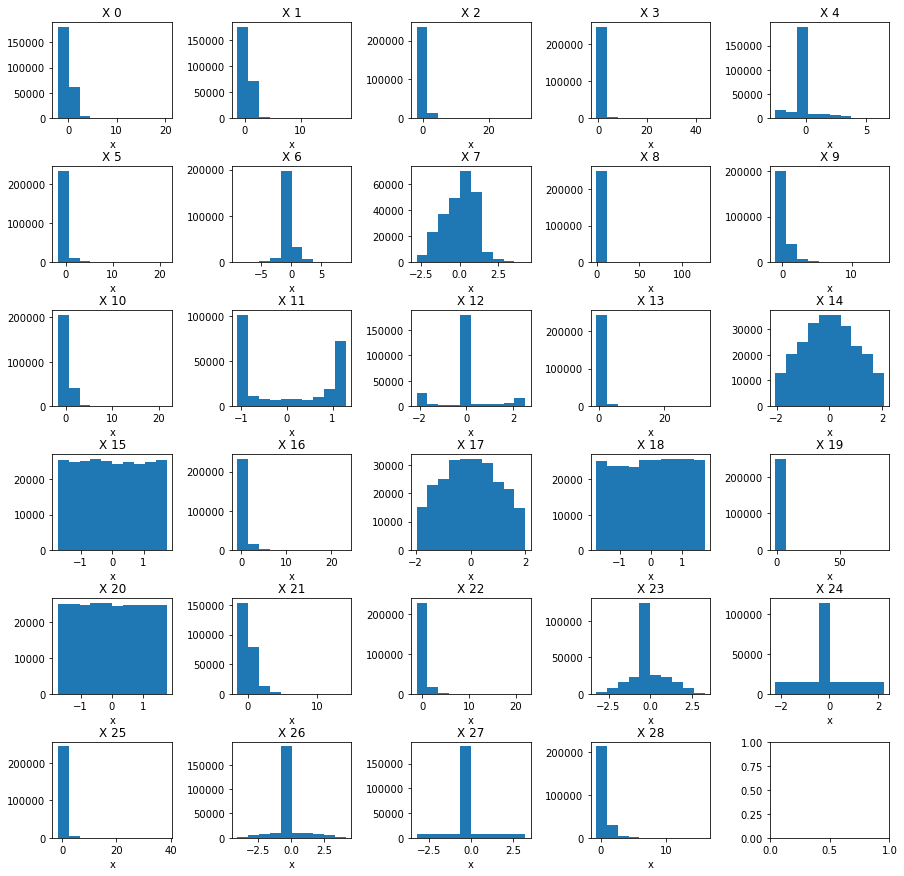

In [207]:
# define the structure of the figure
num_row = 6
num_col = 5

f, axs = plt.subplots(num_row, num_col,figsize=(15,15))

for i in range(tX2.shape[1]):
    ax = axs[i // num_col][i % num_col]
    ax.hist(tX2[:,i])
    ax.set_xlabel("x")
    ax.set_title("X " + str(i))

plt.subplots_adjust(wspace = .5, hspace = .5)

In [57]:
print(np.mean(tX,axis=0))
np.sum(tX[:,0] < -400)
print(np.max(tX[:,0]),np.min(tX[:,0]))

[-4.90230794e+01  4.92398193e+01  8.11819816e+01  5.78959617e+01
 -7.08420675e+02 -6.01237051e+02 -7.09356603e+02  2.37309984e+00
  1.89173324e+01  1.58432217e+02  1.43760943e+00 -1.28304708e-01
 -7.08985189e+02  3.87074191e+01 -1.09730480e-02 -8.17107200e-03
  4.66602072e+01 -1.95074680e-02  4.35429640e-02  4.17172345e+01
 -1.01191920e-02  2.09797178e+02  9.79176000e-01 -3.48329567e+02
 -3.99254314e+02 -3.99259788e+02 -6.92381204e+02 -7.09121609e+02
 -7.09118631e+02  7.30645914e+01]
1192.026 -999.0


In [166]:
from implementations import *


tX, _ , _ = standardize(tX)
#plt.scatter(tX[:,0],y)
#print(tX, tX[:,0])

## Do your thing crazy machine learning thing here :) ...

In [167]:
#############################
#### Innocent test
#############################

import datetime

initial_w = np.zeros(tX.shape[1])
max_iters = 500
gamma = 0.03
ratio = 0.5

x_tr, x_te, y_tr, y_te = split_data(tX, y, ratio, seed=1)
print(x_tr.shape,x_te.shape,y_tr.shape,y_te.shape)
start_time_ls = datetime.datetime.now()
w_ls, mse_ls = least_squares(y_tr, x_tr)
end_time_ls = datetime.datetime.now()
execution_time_ls = (end_time_ls - start_time_ls).total_seconds()

start_time_GD = datetime.datetime.now()
w_GD, loss_GD = least_squares_GD(y, tX, initial_w, max_iters, gamma)
end_time_GD = datetime.datetime.now()
execution_time_GD = (end_time_GD - start_time_GD).total_seconds()

start_time_SGD = datetime.datetime.now()
w_SGD, loss_SGD = least_squares_SGD(y, tX, initial_w, max_iters, gamma)
end_time_SGD = datetime.datetime.now()
execution_time_SGD = (end_time_SGD - start_time_SGD).total_seconds()
print('LS : accuracy :', compute_accuracy(x_te, y_te, w_ls), 'execution time : ', execution_time_ls)
print('GD : accuracy :', compute_accuracy(x_te, y_te, w_GD), 'execution time : ', execution_time_GD)
print('SGD : accuracy :', compute_accuracy(x_te, y_te ,w_SGD), 'execution time : ', execution_time_SGD)

#weights = w_ls


(125000, 30) (125000, 30) (125000,) (125000,)
LS : accuracy : 71.7992 execution time :  0.010991
GD : accuracy : 71.8664 execution time :  2.92244
SGD : accuracy : 50.434400000000004 execution time :  14.101019


0.0001 0.9909350153668672
0.00013738237958832623 0.987839301453775
0.00018873918221350977 0.9838204606023069
0.0002592943797404667 0.9787047121804328
0.0003562247890262444 0.9723578732159909
0.0004893900918477494 0.9647392282317858
0.0006723357536499335 0.9559642400790558
0.0009236708571873865 0.9463530585739097
0.0012689610031679222 0.9364324440817022
0.0017433288221999873 0.9268679889032048
0.002395026619987486 0.9183261610666145
0.0032903445623126675 0.9112827868044753
0.004520353656360241 0.9058397084411801
0.006210169418915616 0.9016951037005995
0.008531678524172805 0.8983471646611109
0.011721022975334805 0.8953762011092115
0.01610262027560939 0.8925880755696902
0.02212216291070448 0.8899845161963925
0.03039195382313198 0.887677110432749
0.041753189365604 0.8858064899129449
0.05736152510448681 0.88446594333472
0.07880462815669913 0.8836517862879781
0.1082636733874054 0.8832585566288345
0.14873521072935117 0.8831204632520486
0.20433597178569418 0.8830886708072048
0.2807216203941176

Text(0, 0.5, 'accuracy')

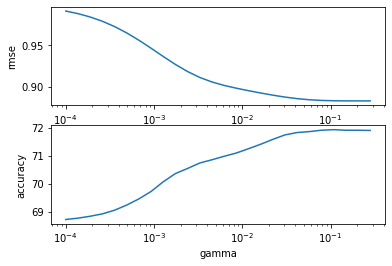

In [174]:
#############################
#### Choose gamma, GD 
#############################
gammas = np.logspace(-4, 0, 30)[:26]
initial_w = np.zeros(tX.shape[1])
max_iters = 200
rmse = []
accuracy = []
for gamma in gammas:
    start_time_GD = datetime.datetime.now()
    w_GD, loss_GD = least_squares_GD(y, tX, initial_w, max_iters, gamma)
    rmse.append(np.sqrt(2 * loss_GD))
    accuracy.append( compute_accuracy(tX, y, w_GD))
    print(gamma, np.sqrt(2 * loss_GD))
    end_time_GD = datetime.datetime.now()
    execution_time_GD = (end_time_GD - start_time_GD).total_seconds()

plt.subplot(2, 1, 1)
plt.plot(gammas, rmse)
plt.xscale('log')
plt.xlabel('gamma')
plt.ylabel('rmse')
plt.subplot(2, 1, 2)
plt.plot(gammas, accuracy)
plt.xscale('log')
plt.xlabel('gamma')
plt.ylabel('accuracy')


In [172]:
np.logspace(-4, 0, 30)

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])

In [146]:
#############################
#### With CV 
#############################

def best_degree_selection(degrees, k_fold, model, seed = 1):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    #for each degree, we compute the best param and the associated rmse
    best_param = []
    best_rmses = []
    best_accuracy = []
    
    model2 = model.copy()
    
    #vary degree
    for i, degree in enumerate(degrees):
        
        print("Progress : ", i/len(degrees)*100 , " % ")
        store_rmse_te = []

        if model["model"] == 'ridge':
            params = model["param"]
            for p in params:
                
                rmse_te_tmp = []
                accuracy_tmp = []
                model2["param"] = p
                
                for k in range(k_fold):
                    _, rmse_te, _, accuracy = cross_validation(y, tX, k_indices, k, model2, int(degree))
                    rmse_te_tmp.append(rmse_te)
                    accuracy_tmp.append(accuracy)
                store_rmse_te.append(np.mean(rmse_te_tmp))
                best_accuracy.append(np.mean(accuracy_tmp))
        
            ind_param_opt = np.argmin(rmse_te)
            best_param.append(gammas[ind_param_opt])
            best_rmses.append(store_rmse_te[ind_param_opt])
            
        elif model["model"] != 'ridge':
            
            if model["model"] == 'GD' or model["model"] == 'SGD':
                # weights
                model2["initial_w"] = np.zeros(int(tX.shape[1] * degree + 1))
            
            rmse_te_tmp = []
            accuracy_tmp = []
            for k in range(k_fold):
                _, rmse_te, _, accuracy = cross_validation(y, tX, k_indices, k, model2, int(degree))
                rmse_te_tmp.append(rmse_te)
                accuracy_tmp.append(accuracy)
                
            best_rmses.append(np.mean(rmse_te_tmp))
            best_accuracy.append(np.mean(accuracy_tmp))

        
    ind_best_degree =  np.argmin(best_rmses)
    plt.subplot(2, 1, 1)
    plt.plot(degrees, best_rmses)
    plt.xlabel('degrees')
    plt.ylabel('rmse')
    plt.subplot(2, 1, 2)
    plt.plot(degrees, best_accuracy)
    plt.xlabel('degrees')
    plt.ylabel('accuracy')
        
    return degrees[ind_best_degree]

In [144]:
max_iters = 200

lambdas = np.logspace(-4, 0, 30)
degrees = np.linspace(1,10,10)
k_fold = 5

parameters_GD = {
  "model": "GD",
  "param": max_iters,
}


parameters_SGD = {
  "model": "SGD",
  "param": max_iters,
}

parameters_LS = {
  "model": "LS",
}

parameters_ridge = {
  "model": "ridge",
  "param": lambdas,
}

Progress :  0.0  % 
Progress :  10.0  % 
Progress :  20.0  % 
Progress :  30.0  % 
Progress :  40.0  % 
Progress :  50.0  % 
Progress :  60.0  % 
Progress :  70.0  % 
Progress :  80.0  % 
Progress :  90.0  % 


1.0

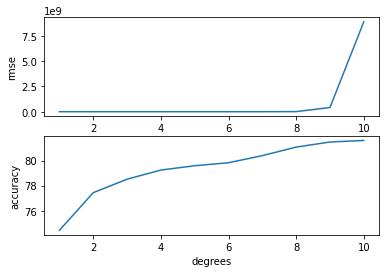

In [175]:
best_degree_selection(degrees, k_fold, parameters_LS, seed = 1)

Progress :  0.0  % 
Progress :  10.0  % 


/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/scripts/implementations.py:72: RuntimeWarning: overflow encountered in square
  return 1/2*np.mean(error**2)
/Users/ines/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/scripts/implementations.py:112: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient
/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/scripts/proj1_helpers.py:30: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0)] = -1
/Users/ines/Documents/SV/SV-MA3/ML_course/projects/project1/scripts/proj1_helpers.py:31: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0)] = 1


Progress :  20.0  % 
Progress :  30.0  % 
Progress :  40.0  % 
Progress :  50.0  % 
Progress :  60.0  % 
Progress :  70.0  % 
Progress :  80.0  % 
Progress :  90.0  % 


2.0

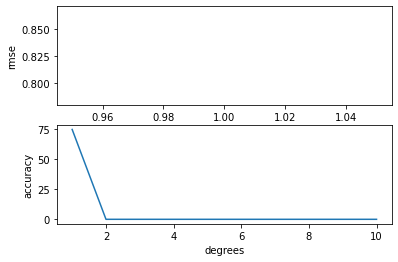

In [176]:
best_degree_selection(degrees, k_fold, parameters_GD, seed = 1)


Progress :  0.0  % 
Progress :  10.0  % 
Progress :  20.0  % 
Progress :  30.0  % 
Progress :  40.0  % 
Progress :  50.0  % 
Progress :  60.0  % 
Progress :  70.0  % 
Progress :  80.0  % 
Progress :  90.0  % 


ValueError: x and y must have same first dimension, but have shapes (10,) and (300,)

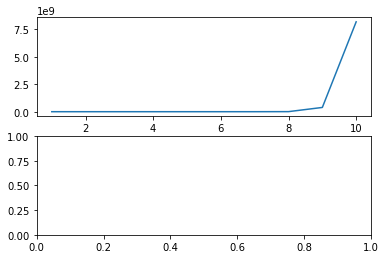

In [143]:
best_degree_selection(degrees, k_fold, parameters_ridge, seed = 1)

## Generate predictions and save ouput in csv format for submission:

In [52]:
DATA_TEST_PATH = '/Users/ines/Documents/SV/SV-MA3/ML/ML_course/projects/project1/data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [53]:
OUTPUT_PATH = '/Users/ines/Documents/SV/SV-MA3/ML/ML_course/projects/project1/data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
# with least_squares : 0.703 - 0.66